
<h1 align="center">Heart Failure Prediction</h1>
<h4>Domain: Healthcare and Medical Research</h4>


**Dataset Name**: Heart Failure Prediction

**Description**: This dataset contains clinical records of patients who were diagnosed with heart failure, collected in 2015. The data is intended to aid in the prediction of heart failure outcomes based on various clinical and demographic features. It includes 12 features collected during follow-up visits.

**Source**: The dataset is sourced from Kaggle [link](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data)

**Citation**: Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). ([link](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5))

**Objective**: To develop a predictive model to identify patients at risk of heart failure. By analyzing the clinical features, the model can help healthcare providers take preventive measures and improve patient outcomes:

1.   Identify key clinical indicators that are predictive of heart failure
2.   Evaluate different machine learning models to find a most accurate predictor
3.   Provide actionable insights for healthcare providers to improve management and preventive care for patients.





<h2>Explanation of each column:</h2>

| Column Name       | Description                                              | Data Type | Notes                               |
|-------------------|----------------------------------------------------------|-----------|-------------------------------------|
| age               | Age of the patient                                       | Float   | Years                               |
| anaemia           | Presence of anemia                                       | Integer   | 1: Yes, 0: No                       |
| creatinine_phosphokinase | Level of the CPK enzyme in the blood                 | Integer   | mcg/L                               |
| diabetes          | Presence of diabetes                                     | Integer   | 1: Yes, 0: No                       |
| ejection_fraction | Percentage of blood leaving the heart with each contraction | Integer   | Percentage                          |
| high_blood_pressure | Presence of high blood pressure                        | Integer   | 1: Yes, 0: No                       |
| platelets         | Platelet count in the blood                              | Float     | kiloplatelets/mL                    |
| serum_creatinine  | Level of serum creatinine in the blood                   | Float     | mg/dL                               |
| serum_sodium      | Level of serum sodium in the blood                       | Integer   | mEq/L                               |
| sex               | Gender of the patient                                    | Integer   | 1: Male, 0: Female                  |
| smoking           | Smoking status                                           | Integer   | 1: Yes, 0: No                       |
| time              | Follow-up period (days)                                  | Integer   | Days                                |
| DEATH_EVENT       | Death event (target variable)                            | Integer   | 1: Yes, 0: No                       |


###Visual inspection of the data

In [1]:
import pandas as pd
import numpy as np

# Create a DataFrame
df = pd.read_csv('Healthcare_Heart.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

# Add blank lines for readability
print()
print()

# Information about DataFrame size
num_rows, num_columns = df.shape
print(f"The DataFrame has {num_rows} rows and {num_columns} columns.")

First 5 rows of the DataFrame:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        

###Exploratory Data Analysis (EDA)

Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.

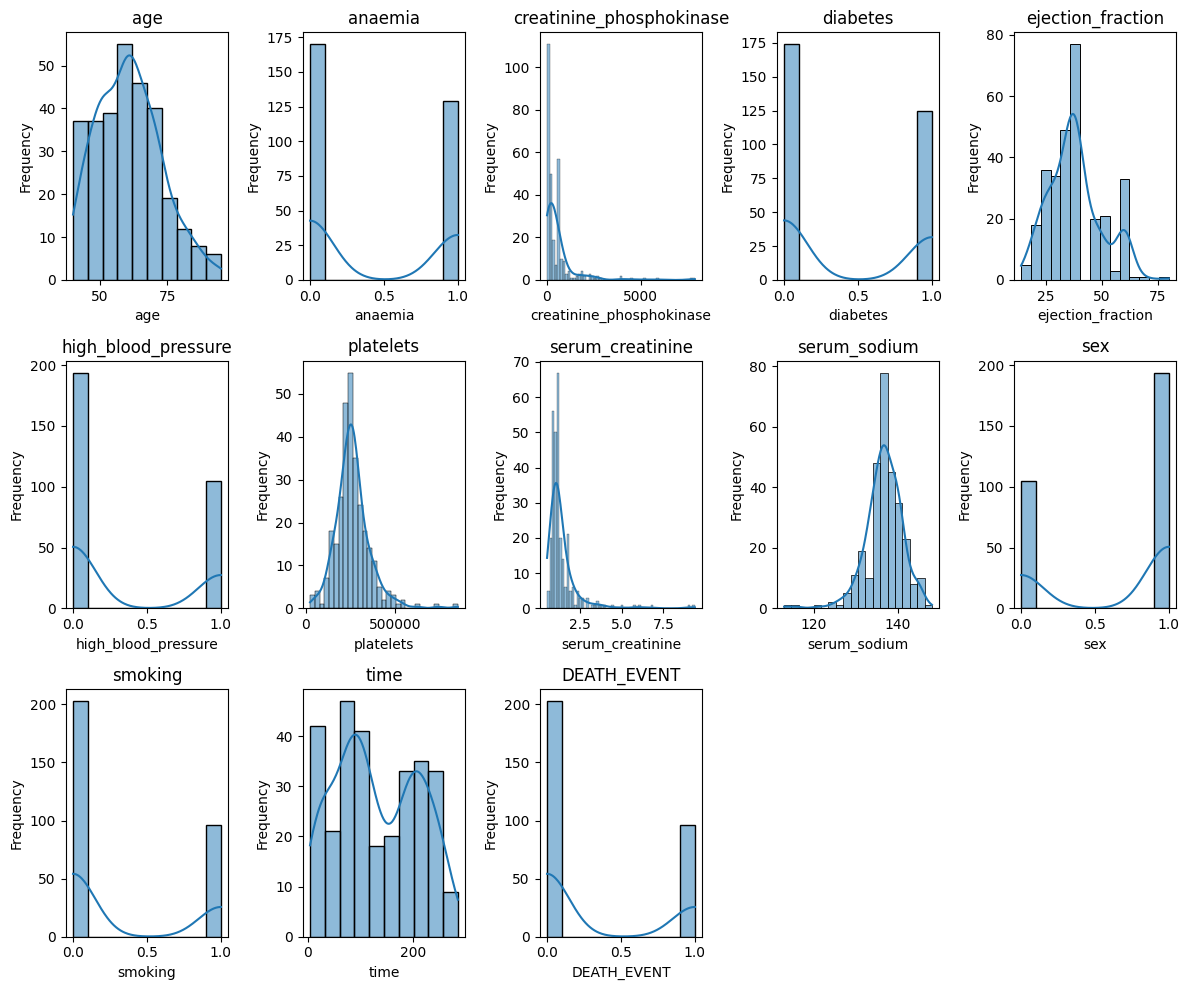


Correlation Summaries:
smoking and sex: There is a moderate correlation (0.4459).
DEATH_EVENT and time: There is a moderate correlation (-0.5270).


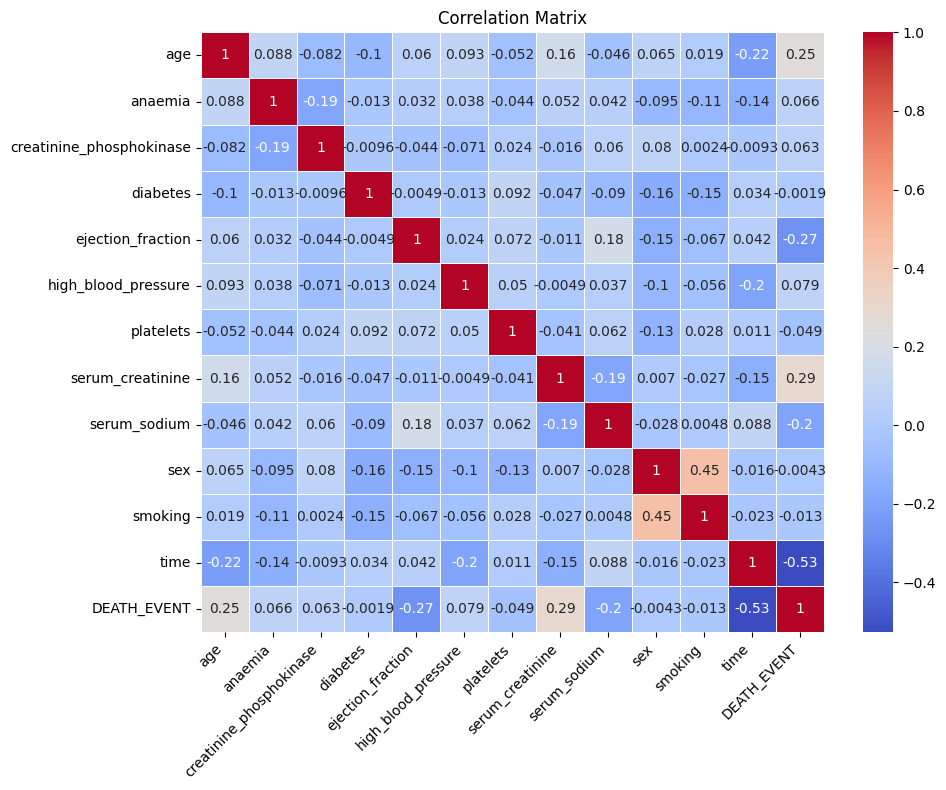


Variance of Numerical Columns:
age                         1.414865e+02
anaemia                     2.461224e-01
creatinine_phosphokinase    9.414586e+05
diabetes                    2.441023e-01
ejection_fraction           1.400635e+02
high_blood_pressure         2.286144e-01
platelets                   9.565669e+09
serum_creatinine            1.070211e+00
serum_sodium                1.946996e+01
sex                         2.286144e-01
smoking                     2.187156e-01
time                        6.023965e+03
DEATH_EVENT                 2.187156e-01
dtype: float64


In [5]:
# Dataframe Information
print("Dataframe Information:")
print(df.info())

# Check for missing values
missing_values = df.isnull().sum().sum()  # Total number of missing values in the DataFrame
print()
if missing_values == 0:
    print("There are no missing values in the DataFrame.")
else:
    print(f"There are {missing_values} missing values in the DataFrame.")
print()

# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())
print()

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Check for outliers - numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Using IQR method for each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Column '{col}' has {len(outliers)} outliers according to IQR method.")
print()
print("At this point, we will keep the outliers as they may be clinically significant and represent real,\nvalid cases. It may also ensure that the future model accounts for any possible scenarious including extreme cases.")
print()
print()

print("Histograms:")
print()
# Histograms for numerical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 5, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print()

# Correlation matrix
corr_matrix = df.corr()

# Define thresholds for interpreting correlations
moderate_corr_threshold = 0.3
high_corr_threshold = 0.6

# Function to summarize correlations
def summarize_correlations(corr_matrix):
    print("Correlation Summaries:")
    visited_pairs = set()  # To keep track of visited pairs
    for i, col in enumerate(corr_matrix.columns):
        for j, row in enumerate(corr_matrix.index):
            if i != j:  # Exclude self-correlation (diagonal elements)
                pair = tuple(sorted([row, col]))  # Sort pair to avoid duplicate output
                if pair not in visited_pairs:
                    visited_pairs.add(pair)
                    correlation = corr_matrix.loc[row, col]  # Access correlation value
                    if abs(correlation) >= high_corr_threshold:
                        print(f"{row} and {col}: There is a high correlation ({correlation:.4f}).")
                    elif abs(correlation) >= moderate_corr_threshold:
                        print(f"{row} and {col}: There is a moderate correlation ({correlation:.4f}).")

# Print correlation summaries
summarize_correlations(corr_matrix)

# Visualize correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print()

# Calculate variance for numerical columns
print("Variance of Numerical Columns:")
variances = df[numerical_cols].var()
print(variances)


#####**Descriptive Statistics summary:**
---

Age distribution has a mean or average age of patients at around 60.83 years old, suggesting the dataset covers a range of adult age groups. There is a standard deviation of ~11.89 years, suggesting some diversity in the ages of patients. The range is age 40-95 years old; a broad range.

There is a prevalence of health conditions: Anaemia ~43% of patients, diabetes ~42% of patients, and high blood pressure ~35% of patients with these conditions.

Clinical measurements: The average ejection fraction (measures percentage of blood leaving the heart with each contraction) is ~38.08% which is important in assessing heart function. Serum Creatinine is ~1.39 mg/dL with a standard deviation of 1.03 showing variability in kidney function markers among patients. The average serum sodium level is ~136.63 mEq/L with a standard deviation of 4.41. The average platelet count is 263,358 kiloplatelets/mL with a noteworthy standard deviation of 97,804 indicating variability in these levels among patients.

Demographics: The dataset is mostly male patients (64.88%). Around 32.11% of patients are smokers.

Follow-up period: The mean time is ~130.26 days with a range of 4-285 days. This may assist in understanding how long patients were monitored during the study.

Outcome variable: Death. The dataset includes patients with both outcomes. 31.07% experienced a death event (DEATH_EVENT=1) and 68.93% did not.


#####**Outliers**
---

At this point, we will keep the outliers as they may be clinically significant and represent real, valid cases. It may also ensure that the future model accounts for any possible scenarious including extreme cases.

#####**Correlation Summaries at this point:**
---

smoking and sex: There is a moderate correlation (0.4459).<br>
DEATH_EVENT and time: There is a moderate correlation (-0.5270).

#####**Variance:**
---

High variance: creatinine_phosphokinase at (9.414586e+05) suggesting significant variability in enzyme levels among patients. platelets at (9.565669e+09) suggesting significant variability in platelet counts among patients.

Moderate variance: age, ejection_fraction (1.414865e+02 and 1.400635e+02, respectively) suggest some degree of variability.  serum_creatinine and serum_sodium (1.070211e+00 and 1.946996e+01, respectively) with this variability in the markers possibly indicating differences in kidney function (serum creatinine) and electrolyte balance (serum sodium) among patients.

Low variance: anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT at ~ 0.2 indicating they are mostly concentrated in one or a few categories across the dataset. Eg. anaemia, diabetes, high blood pressure, sex, and smoking are binary variables, so their variance may reflect the proportion of patients with each condition or characteristic. Time 6.023965e+03 is higher when compared to categorical variables but lower when compared to continuous variables like creatinine_phosphokinase and platelets. This may indicate some variability in follow-up times among the patients.

###Feature Selection

In [9]:
# Variance
variance_threshold = 1.0

# Filter features based on variance threshold
selected_features = variances[variances >= variance_threshold].index.tolist()

# Print selected features
print("Selected Features based on Variance Threshold:")
print(selected_features)
print()

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]
y = df['DEATH_EVENT']

# RandomForestClassifier for Feature Importance
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print("Feature Importances from Random Forest:")
print(feature_importances.sort_values(ascending=False))
print()

# Recursive Feature Elimination (RFE) with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=5)
rfe.fit(X, y)
print("RFE Feature Ranking:")
print(pd.Series(rfe.ranking_, index=X.columns))
print()

# Mutual Information
mi = SelectKBest(mutual_info_classif, k=5)
mi.fit(X, y)
print("Mutual Information Scores:")
print(pd.Series(mi.scores_, index=X.columns))
print()

# Statistical Test
from sklearn.feature_selection import f_classif

X = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]
y = df['DEATH_EVENT']

# ANOVA F-test for the numerical features
anova_f_values, p_values = f_classif(X, y)
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Value': anova_f_values, 'p-Value': p_values})
print("ANOVA F-test Results:")
print(anova_results.sort_values(by='F-Value', ascending=False))


Selected Features based on Variance Threshold:
['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

Feature Importances from Random Forest:
time                        0.386138
serum_creatinine            0.158769
ejection_fraction           0.119401
platelets                   0.093357
age                         0.090548
creatinine_phosphokinase    0.082898
serum_sodium                0.068889
dtype: float64

RFE Feature Ranking:
age                         1
creatinine_phosphokinase    1
ejection_fraction           1
platelets                   3
serum_creatinine            1
serum_sodium                2
time                        1
dtype: int64

Mutual Information Scores:
age                         0.041473
creatinine_phosphokinase    0.013203
ejection_fraction           0.077153
platelets                   0.000000
serum_creatinine            0.064242
serum_sodium                0.011772
time                        0

Based on the comprehensive analysis across various feature selection methods, the consistently identified important features are:  

*   Age: Identified as significant across ANOVA F-test, Random Forest feature importance, and Recursive Feature Elimination (RFE).
*   Ejection Fraction: Highlighted as important by Random Forest feature importance, RFE, and ANOVA F-test.
*   Serum Creatinine: Consistently shown as important in Random Forest feature importance, RFE, and ANOVA F-test.
*   Serum Sodium: Identified as relevant in ANOVA F-test and Mutual Information scores.
*   Time: Demonstrated as crucial in Random Forest feature importance and ANOVA F-test.

##Data Preparation

In [10]:
from sklearn.model_selection import train_test_split

# Feature selection based on variance threshold
selected_features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']

# Identifying the Target
target = 'DEATH_EVENT'

# Use only selected features
X = df[selected_features]
y = df[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print out to confirm
print("Selected Features based on Variance Threshold:")
print(selected_features)
print()
print(f"Target: {target}")
print()
print("Data Preparation Completed:")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Selected Features based on Variance Threshold:
['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']

Target: DEATH_EVENT

Data Preparation Completed:
Training set size: 239 samples
Testing set size: 60 samples


##Algorithms

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings

# Instantiate the classifiers
log_reg = LogisticRegression(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
svm_classifier = SVC(random_state=42)

# Train and evaluate each model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print(f"{type(model).__name__}:")
    print(f"Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")
    print(f"Test  - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1 Score: {test_f1:.4f}")
    print()

# Train and evaluate Logistic Regression
train_and_evaluate(log_reg, X_train, X_test, y_train, y_test)

# Train and evaluate Random Forest Classifier
train_and_evaluate(rf_classifier, X_train, X_test, y_train, y_test)

# Train and evaluate Gradient Boosting Classifier
train_and_evaluate(gb_classifier, X_train, X_test, y_train, y_test)

# Train and evaluate SVM Classifier
train_and_evaluate(svm_classifier, X_train, X_test, y_train, y_test)


# Suppress warnings for undefined precision during evaluation
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

LogisticRegression:
Train - Accuracy: 0.8410, Precision: 0.7463, Recall: 0.7042, F1 Score: 0.7246
Test  - Accuracy: 0.7833, Precision: 0.9286, Recall: 0.5200, F1 Score: 0.6667

RandomForestClassifier:
Train - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Test  - Accuracy: 0.6833, Precision: 0.6667, Recall: 0.4800, F1 Score: 0.5581

GradientBoostingClassifier:
Train - Accuracy: 0.9958, Precision: 1.0000, Recall: 0.9859, F1 Score: 0.9929
Test  - Accuracy: 0.7167, Precision: 0.8333, Recall: 0.4000, F1 Score: 0.5405

SVC:
Train - Accuracy: 0.8619, Precision: 0.8800, Recall: 0.6197, F1 Score: 0.7273
Test  - Accuracy: 0.7167, Precision: 0.8333, Recall: 0.4000, F1 Score: 0.5405



SVC shows comparable test set performance (accuracy, precision, recall, F1 score) to Logistic Regression and Gradient Boosting Classifier but does not outperform them. Logistic Regression has a higher F1 score on the test set (0.6667) compared to SVC (0.5405), indicating better overall balance between precision and recall. Gradient Boosting Classifier, while having similar F1 score on the test set as SVC, shows higher accuracy and precision. SVC exhibits higher training set accuracy (0.8619) and F1 score (0.7273) compared to its test set performance (accuracy: 0.7167, F1 score: 0.5405). This discrepancy suggests potential overfitting, where the model is fitting too closely to the training data and not generalizing well to unseen data. Logistic Regression and Gradient Boosting Classifier demonstrate more balanced performance across accuracy, precision, recall, and F1 score metrics on the test set, indicating they may be more robust and suitable for this classification task compared to SVC. With these considerations, it is justified to drop the SVC at this time.

###Hyperparameter Tuning



Reduced Parameter Grids for RandomForestClassifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Define a narrower parameter grid for RandomizedSearchCV
param_grid_rf = {
    'n_estimators': randint(50, 100),
    'max_depth': randint(3, 6),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Instantiate RandomForestClassifier with default hyperparameters
rf = RandomForestClassifier(random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform RandomizedSearchCV with reduced parameters
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, n_iter=30,
                               cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Get the best estimator from RandomizedSearchCV
best_rf = rf_random.best_estimator_

# Train and evaluate function with improved output format
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"{type(model).__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report (0=no death event, 1=death event):")
    print(classification_report(y_test, y_pred))
    print()

print()
# Evaluate best Random Forest model
print("Random Forest Classifier - Best Parameters:")
print(rf_random.best_params_)
train_and_evaluate(best_rf, X_train, X_test, y_train, y_test)


Fitting 3 folds for each of 30 candidates, totalling 90 fits

Random Forest Classifier - Best Parameters:
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 70}
RandomForestClassifier
Accuracy: 0.7833
Precision: 0.8021
Recall: 0.7833
F1 Score: 0.7719

Classification Report (0=no death event, 1=death event):
              precision    recall  f1-score   support

           0       0.75      0.94      0.84        35
           1       0.88      0.56      0.68        25

    accuracy                           0.78        60
   macro avg       0.81      0.75      0.76        60
weighted avg       0.80      0.78      0.77        60




Reduced Parameter Grids for GradientBoostingClassifier

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Define a very simplified parameter grid for GradientBoostingClassifier
param_grid_gb = {
    'learning_rate': [0.1],
    'n_estimators': [100],
    'max_depth': [3],
}

# Instantiate Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Split data into train and test sets (assuming X_train, X_test, y_train, y_test are already defined)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform RandomizedSearchCV for Gradient Boosting
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=param_grid_gb, n_iter=1,
                               cv=3, verbose=2, random_state=42, n_jobs=-1)
gb_random.fit(X_train, y_train)

# Get the best estimator from RandomizedSearchCV
best_gb = gb_random.best_estimator_

# Train and evaluate best Gradient Boosting model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(type(model).__name__)
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    print()

# Train and evaluate best Gradient Boosting model
print("Gradient Boosting Classifier - Best Parameters:")
print(gb_random.best_params_)
train_and_evaluate(best_gb, X_train, X_test, y_train, y_test)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Gradient Boosting Classifier - Best Parameters:
{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
GradientBoostingClassifier
Accuracy: 0.7167, Precision: 0.7483, Recall: 0.7167, F1 Score: 0.6891
              precision    recall  f1-score   support

           0       0.69      0.94      0.80        35
           1       0.83      0.40      0.54        25

    accuracy                           0.72        60
   macro avg       0.76      0.67      0.67        60
weighted avg       0.75      0.72      0.69        60




GridSearchCV for tuning Logistic Regression

In [14]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined
# Eg: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
# 'C' is parameter-represents inverse of regularized strength (smaller values specify stronger regularization)
# regularization strength refers to degree to which coefficients (weights) of machine learning model are penalized
# with higher values indicating weaker regularization and potentially more complex models
param_grid = {
    'C': [0.1, 1.0, 10.0], # Different values that will be tested during hyperparameter tuning process/trained & evaluated
    'penalty': ['l2']  # Only 'l2' penalty for lbfgs solver; specifies the norm used in penalization; typically works with l2
}

# Instantiate Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Logistic Regression - Best Parameters:")
print(grid_search.best_params_)
print()

# Evaluate on test set
y_pred = grid_search.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Logistic Regression - Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Logistic Regression - Best Parameters:
{'C': 0.1, 'penalty': 'l2'}

Logistic Regression - Performance Metrics:
Accuracy: 0.7833
Precision: 0.8181
Recall: 0.7833
F1 Score: 0.7675

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        35
           1       0.93      0.52      0.67        25

    accuracy                           0.78        60
   macro avg       0.83      0.75      0.75        60
weighted avg       0.82      0.78      0.77        60



Visualize tuned models

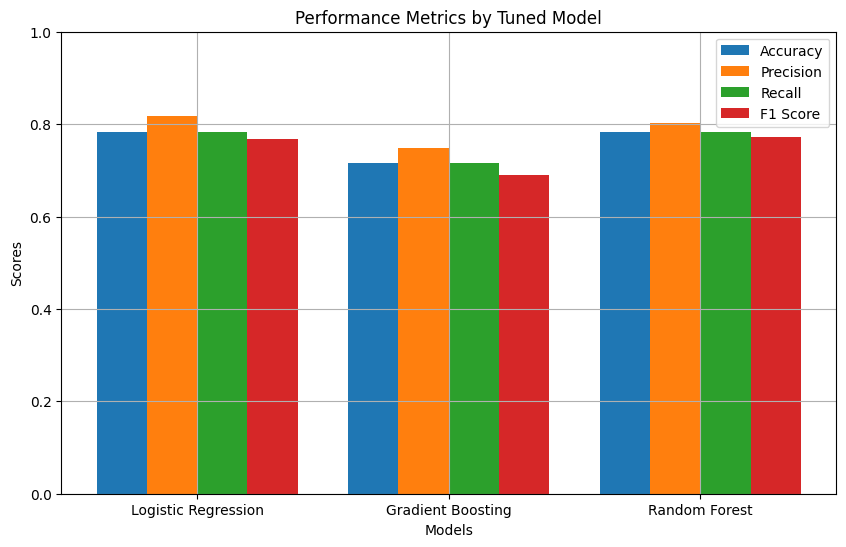

In [15]:
# Metrics for each model
models = ['Logistic Regression', 'Gradient Boosting', 'Random Forest']
accuracy = [0.7833, 0.7167, 0.7833]
precision = [0.8181, 0.7483, 0.8021]
recall = [0.7833, 0.7167, 0.7833]
f1_score = [0.7675, 0.6891, 0.7719]

# Plotting
x = range(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, accuracy, width, label='Accuracy')
rects2 = ax.bar([p + width for p in x], precision, width, label='Precision')
rects3 = ax.bar([p + 2 * width for p in x], recall, width, label='Recall')
rects4 = ax.bar([p + 3 * width for p in x], f1_score, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Tuned Model')
ax.set_xticks([p + 1.5 * width for p in x])
ax.set_xticklabels(models)
ax.legend()

plt.ylim(0, 1)
plt.grid(True)
plt.show()


###Model Performance Metrics

**Tuned Logistic Regression:**

*   Best Parameters: {'C': 0.1, 'penalty': 'l2'}
*   Accuracy: 0.7833, Precision: 0.8181, Recall: 0.7833, F1 Score: 0.7675

**Tuned Gradient Boosting Classifier:**

*   Best Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
*   Accuracy: 0.7167, Precision: 0.7483, Recall: 0.7167, F1 Score: 0.6891


**Tuned Random Forest Classifier:**

*   Best Parameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 70}
*   Accuracy: 0.7833, Precision: 0.8021, Recall: 0.7833, F1 Score: 0.7719


**Interpretation of Results**

Tuned Gradient Boosting showed a lower accuracy and F1 score. Tuned Random Forest provided stable and balanced performance across all metrics, demonstrating robustness with decent accuracy and F1 score, but lower precision compared to Logistic Regression.

**Conclusion of Model Performance Metrics**

Based on the evaluation metrics, tuned Logistic Regression appears to be the most suitable model for this classification task, given its balanced performance across accuracy, precision, recall, and F1 score metrics.



###Conclusion:

## Summary of Findings

- **Dataset Overview:**
  - The dataset comprises 299 patients with 13 clinical variables, including demographic factors, clinical measurements, and health conditions.

- **Key Insights:**
  - **Demographics and Health Conditions:** The dataset predominantly includes adult male patients (64.88%), with significant proportions affected by anaemia (43%), diabetes (42%), and high blood pressure (35%).
  - **Clinical Measurements:** Notable averages include ejection fraction (mean ~38.08%), serum creatinine (mean ~1.39 mg/dL), serum sodium (mean ~136.63 mEq/L), and platelet count (mean ~263,358 kiloplatelets/mL), indicating variability across patients.
  - **Follow-up Period:** Patients were monitored for an average of ~130.26 days, offering insights into the duration of study follow-up.

- **Feature Importance:**
  - Through various feature selection methods, including ANOVA F-test, Random Forest feature importance, and Recursive Feature Elimination (RFE), the following features were consistently identified as predictive of heart failure: 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', and 'time'.

## Model Evaluation and Selection

- **Model Performance:**
  - **Tuned Logistic Regression:** Achieved an accuracy of 78.33% with a precision of 81.81%, recall of 78.33%, and F1 score of 76.75%, demonstrating balanced performance across metrics.
  - **Tuned Gradient Boosting Classifier:** Showed the lowest metrics amongst the models.
  - **Tuned Random Forest Classifier:** Demonstrated robust performance with decent accuracy and F1 score, albeit slightly lower precision compared to Logistic Regression.

- **Model Selection Rationale:**
  - Logistic Regression was selected as the most suitable model due to its balanced performance across all evaluation metrics and its interpretability in clinical settings.

## Clinical Implications and Recommendations

- **Clinical Insights:**
  - The identified predictors can aid healthcare providers in prioritizing interventions and monitoring strategies for patients at higher risk of heart failure.
  - Examples of practical applications include personalized treatment plans based on patient demographics and clinical measurements.

## Limitations and Future Directions

- **Study Limitations:**
  - Potential limitations include the dataset's size and scope, as well as assumptions made during model training.
  - Further validation in diverse patient populations and incorporation of additional clinical variables could enhance model robustness.

- **Future Research Directions:**
  - Future studies could consider exploring additional advanced machine learning techniques or ensemble methods to further enhance predictive accuracy and generalize findings beyond the scope of this project.
  - Research focusing on real-time predictive modeling and integration with electronic health records could further enhance clinical decision support systems.


